<a href="https://colab.research.google.com/github/NicolasPham/DataAnalystProjects/blob/main/SaleAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Sale Data Analysis
#### - Goal of the projects:
- Data Extraction: load "Feather" data
- Data transformation: duplicates, irrelevant, error, missing, types, outliers
- Convert data types of column for further extraction
- Extract part of value like month, city for data viz
- Extract city from address for the most purchased by city for improving marketing
- Understand the trend of selling products in month for managing instock products
- Which products are often sold together for recommendations

#### - Libraries used:
- Pandas / numpy / matplotlib / seaborn
- pyarrow
- plotly.express

### Conclusion:
- December is the best month for sale (because of Chirstmas and New Year holidays) with over 4.5 milion
- San Francisco has the maximum order (over 44000 orders) follow by Los Angeles and New York city
- More than 50% of total order falls into this 3 citys
- Batteries, charging cables and headphones are the most ordered becuase of their price
- April, October and December are the most busiest month of the year when products are purchased
- Iphone, charging cable, wired headphones, airpods are usually purchased together
- Similar to Google Phone, charging cable and heaphones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#!pip install pyarrow

In [2]:
all_data = pd.read_feather(r'/content/drive/MyDrive/Colab Notebooks/Dataset/Sale Data Analysis/Sales_data.ftr')

In [3]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# Check for missing data
print('Shape of all_data: ' + str(len(all_data)))
threshold = len(all_data)*0.05
print('Threshold to drop data: ' + str(threshold))
print('Total missing value: ' + str(all_data.isnull().sum()[0]))
if all_data.isnull().sum()[0] < threshold:
  no_missing_df = all_data.dropna(how = 'all')
print('Shape of new_data_frame: ' + str(no_missing_df.shape))
no_missing_df.isnull().sum()

Shape of all_data: 186850
Threshold to drop data: 9342.5
Total missing value: 545
Shape of new_data_frame: (186305, 6)


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [5]:
# Check duplicated values
print('Number of duplicated values: ' + str(no_missing_df.duplicated().sum()))
no_duplicated = no_missing_df.drop_duplicates()
print('Number of duplicated values after: ' + str(no_duplicated.duplicated().sum()))
print('Shape of no_duplicated values df: ' + str(no_duplicated.shape))

Number of duplicated values: 618
Number of duplicated values after: 0
Shape of no_duplicated values df: (185687, 6)


---
### 1. What is the best month for sale?
- Convert "Order date" to datetime format
- Extract the month from order date
- Convert Price Each to float
- Convert Quantity Ordered to integer
- Plot with plotly.epxress

In [6]:
# Convert object type to datetime type
df = no_duplicated.copy()
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
# Extract month from order date
def return_month(date):
  return date.split('/')[0]

df['month'] = df['Order Date'].apply(return_month)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [8]:
df['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [9]:
df = df[df['month'] != 'Order Date']
df['month'] = df['month'].astype(int)
df['month'].unique()

<ipython-input-9-e209613537a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].astype(int)


array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

In [10]:
df['Price Each'] = df['Price Each'].astype(float)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['total'] = df['Price Each']*df['Quantity Ordered']
df.head()

<ipython-input-10-fcc778c0341e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = df['Price Each'].astype(float)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


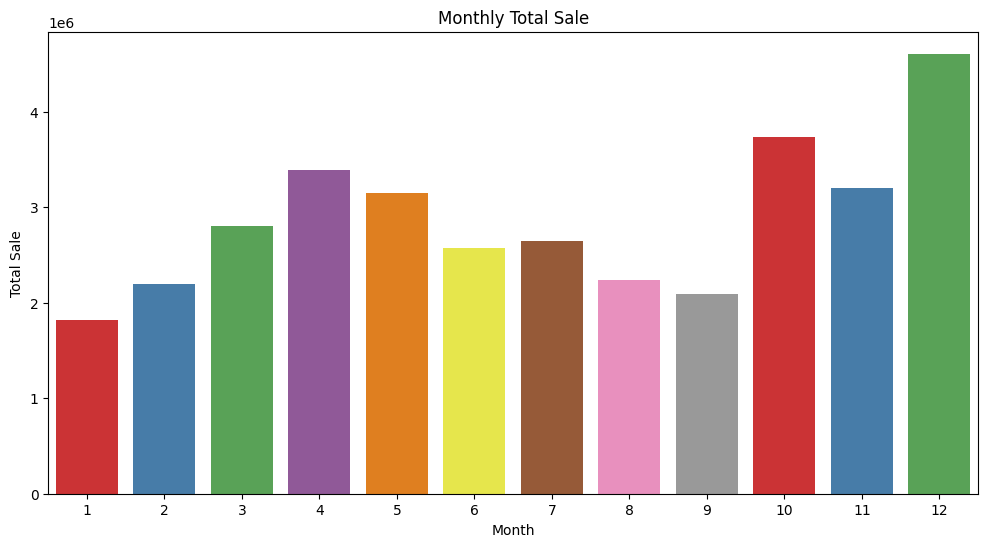

In [33]:
total_sale = df.groupby('month')['total'].sum().reset_index()
total_sale

#fig = px.bar(total_sale, x='month', y ='total', title = 'Monthly Total Sale',
#       labels = {'month': 'Month', 'total': 'Total Sale'}, color = 'total')
#fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1)) #show all values xticks
#fig.show()
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(data = total_sale, x='month', y ='total', hue = 'month', palette='Set1', legend=False)
plt.xlabel('Month')
plt.ylabel('Total Sale')
plt.title('Monthly Total Sale')
plt.show()

---
### 2. Which city has maximum order
- Extract city from Purchase Adress

In [34]:
# Extract city from Purchase address
df['city'] = df['Purchase Address'].str.split(', ').str.get(1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [35]:
df['city'].unique()

array(['Dallas', 'Boston', 'Los Angeles', 'San Francisco', 'Seattle',
       'Atlanta', 'New York City', 'Portland', 'Austin'], dtype=object)

In [36]:
city_order = pd.value_counts(df['city']).reset_index()
city_order = city_order.rename(columns = {'index': 'city', 'city':'total_order'})
city_order

,city,total_order
0,San Francisco,44662
1,Los Angeles,29564
2,New York City,24847
3,Boston,19901
4,Atlanta,14863
5,Dallas,14797
6,Seattle,14713
7,Portland,12449
8,Austin,9890


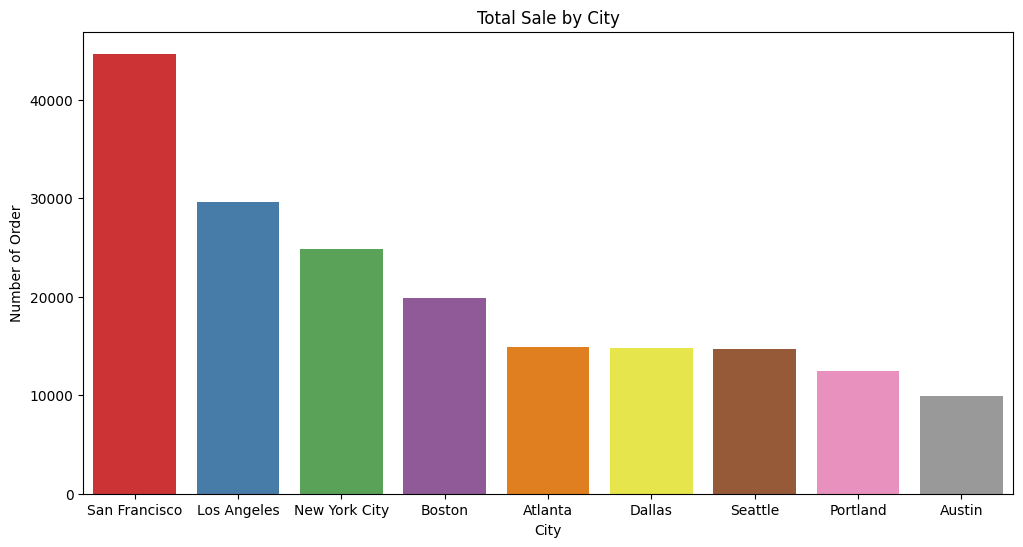

In [40]:
#fig = px.bar(city_order, x = 'city', y = 'total_order', title = 'Total Sale by City',
#  labels = {'city': 'City', 'total_order': 'Number of Order'}, color='city'
#)
#fig.show()
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(city_order, x='city', y='total_order', hue='city', palette='Set1')
plt.xlabel('City')
plt.ylabel('Number of Order')
plt.title('Total Sale by City')

plt.show()

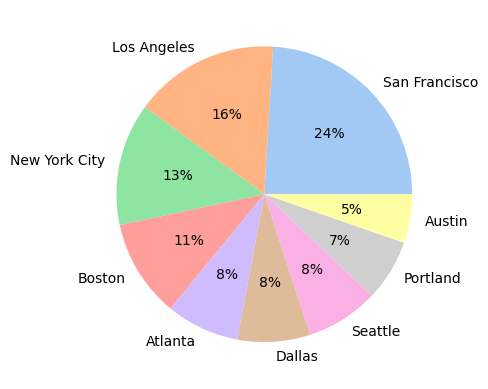

In [48]:
#px.pie(city_order, values = 'total_order', names = 'city')
colors = sns.color_palette('pastel')
plt.pie(city_order['total_order'], labels = city_order['city'], colors = colors, autopct='%.0f%%')
plt.show()

---
### 3. What product sold the most and why?
- Group by product and apply different aggregate function for quantity ordered and price each
- Plot twinx since we share the same xaxis
- Create a pivot table to understand the trend of the most sold product
- Plot the trend of that 5 most sold product

In [49]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [50]:
function_dict = {'Quantity Ordered': 'sum', 'Price Each': 'mean'}
product_sold = df.groupby('Product').agg(function_dict).reset_index()
product_sold

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


<ipython-input-51-3f197351af26>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



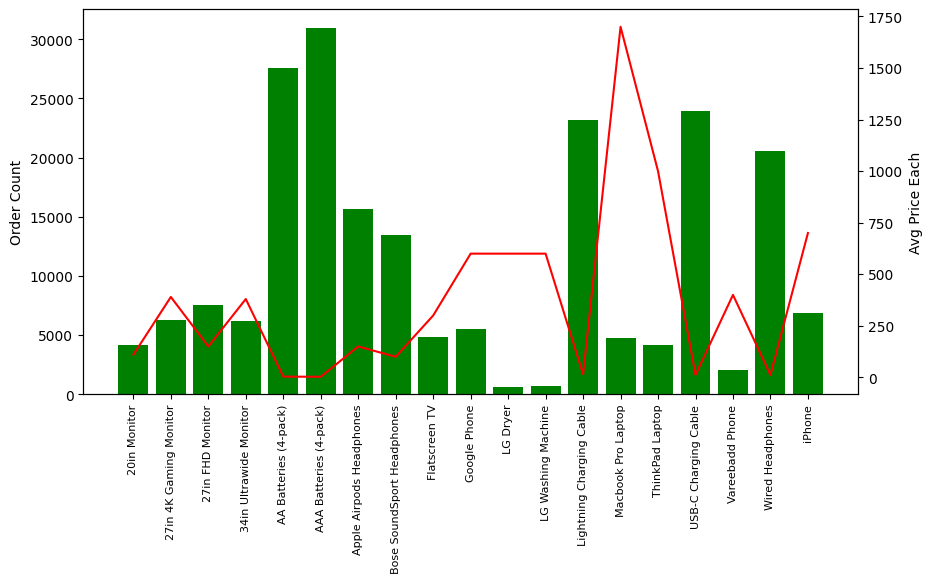

In [51]:
products = product_sold['Product'].values

fig, ax1 = plt.subplots()
fig.set_size_inches(10, 5)
ax2 = ax1.twinx()
ax1.bar(product_sold['Product'], product_sold['Quantity Ordered'], color ='g')
ax2.plot(product_sold['Product'], product_sold['Price Each'], color='r')
ax1.set_xticklabels(products ,rotation='vertical', fontsize = 8)

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg Price Each')

plt.show()

In [52]:
#Filter data to first 5 most sold product
most_sold = df['Product'].value_counts()[:5].index
most_sold

products = df[df['Product'].isin(most_sold)]

In [64]:
pivot = products.pivot_table(values = 'Order ID', index = 'month', columns = 'Product', aggfunc = 'count')
pivot.index.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

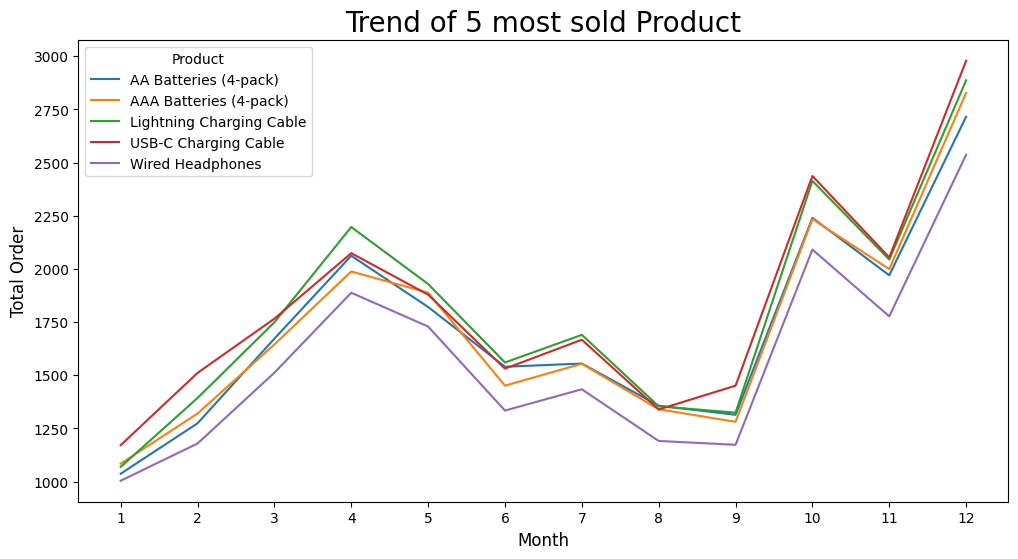

In [70]:
#fig = px.line(pivot, title='Trend of 5 most sold product',
#              labels = {'month': "Month", 'value': 'Total Order'})
#fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1)) #show all values xticks
#
#fig.show()
pivot.plot(figsize=(12,6))
plt.xticks(pivot.index.values)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Order', fontsize=12)
plt.title('Trend of 5 most sold Product', fontsize=20)
plt.show()

---
### 4: What products are most often sold together?

In [55]:
df_duplicated = df[df['Order ID'].duplicated(keep = False)]
dup_df = df_duplicated.groupby('Order ID')['Product'].apply(lambda x: ', '.join(x)).reset_index().rename(columns = {'Product': 'Grouped Product'})
dup_df

,Order ID,Grouped Product
0,141275,"USB-C Charging Cable, Wired Headphones"
1,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
2,141365,"Vareebadd Phone, Wired Headphones"
3,141384,"Google Phone, USB-C Charging Cable"
4,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop, Wired Headphones"
6875,319556,"Google Phone, Wired Headphones"
6876,319584,"iPhone, Wired Headphones"
6877,319596,"iPhone, Lightning Charging Cable"


In [56]:
grouped_products = df_duplicated.merge(dup_df, how='left', on='Order ID').drop_duplicates(subset=['Order ID'])
grouped_products

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total,city,Grouped Product
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone, Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone, USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack), Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable, USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones, ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,09/28/19 13:07,"795 Willow St, New York City, NY 10001",9,700.00,New York City,"iPhone, Wired Headphones"
14120,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,"iPhone, Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,"34in Ultrawide Monitor, AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones, AAA Batteries (4-pack)"


In [57]:
grouped_products['Grouped Product'].value_counts()[:10]

iPhone, Lightning Charging Cable                        886
Google Phone, USB-C Charging Cable                      857
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     79
Vareebadd Phone, Bose SoundSport Headphones              60
Name: Grouped Product, dtype: int64